# Onur Akyüz Fitness Veri Analizi

Bu notebook'ta fitness verilerinizin detaylı analizini ve görselleştirmelerini gerçekleştireceğiz.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Görselleştirme ayarları
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['font.size'] = 10

## 1. Veri Yükleme ve Temizleme

In [7]:
# Veri yükleme
df = pd.read_csv('../data/ONUR FITNESS DATA.csv', sep=';')

# Boş satırları temizleme
df = df.dropna(how='all')

# '-' değerlerini NaN olarak değiştirme ve bu satırları kaldırma
df = df.replace('-', np.nan)
df = df.dropna()

# Tarih sütununu datetime formatına çevirme
df['Antrenman Tarihi'] = pd.to_datetime(df['Antrenman Tarihi'], format='%d.%m.%Y')

# Kalori değerlerini sayısal formata çevirme
df['Yakılan Kalori'] = df['Yakılan Kalori'].str.replace(' KCAL', '').astype(float)

# Kalp atış hızını sayısal formata çevirme
df['Ortalama Kalp Atış Hızı'] = df['Ortalama Kalp Atış Hızı'].str.replace(' v/dk', '').astype(float)

# Antrenman süresini dakikaya çevirme
def convert_time_to_minutes(time_str):
    if ':' not in time_str:
        return np.nan
    parts = time_str.split(':')
    if len(parts) == 3:
        h, m, s = map(int, parts)
    else:
        h, m = map(int, parts)
        s = 0
    return h * 60 + m + s/60

df['Antrenman Süresi (Dakika)'] = df['Antrenman Süresi'].apply(convert_time_to_minutes)

df.head()

,Antrenman Tarihi,Antrenör,Yakılan Kalori,Ortalama Kalp Atış Hızı,Antrenman Süresi,Antrenman Süresi (Dakika)
0,2022-09-03,Delil Hoca,422.0,112.0,01:13:20,73.333333
1,2022-09-05,Delil Hoca,844.0,129.0,01:27:47,87.783333
2,2022-09-07,Delil Hoca,840.0,132.0,01:21:17,81.283333
3,2022-09-10,Delil Hoca,971.0,134.0,01:28:16,88.266667
4,2022-09-12,Delil Hoca,670.0,122.0,01:16:27,76.450000


## 2. Temel İstatistikler

In [8]:
print("=== TEMEL İSTATİSTİKLER ===")
print(f"Toplam Antrenman Sayısı: {len(df)}")
print(f"Toplam Yakılan Kalori: {df['Yakılan Kalori'].sum():.0f} KCAL")
print(f"Ortalama Antrenman Süresi: {df['Antrenman Süresi (Dakika)'].mean():.1f} dakika")

print("\nAntrenör Bazlı Antrenman Sayıları:")
print(df['Antrenör'].value_counts())

print("\nDetaylı İstatistikler:")
stats = df[['Yakılan Kalori', 'Ortalama Kalp Atış Hızı', 'Antrenman Süresi (Dakika)']].describe()
print(stats)

=== TEMEL İSTATİSTİKLER ===
Toplam Antrenman Sayısı: 69
Toplam Yakılan Kalori: 40715 KCAL
Ortalama Antrenman Süresi: 72.4 dakika

Antrenör Bazlı Antrenman Sayıları:
Antrenör
Cafer Hoca    22
Delil Hoca    16
Onur Hoca     16
Murat Hoca    15
Name: count, dtype: int64

Detaylı İstatistikler:
       Yakılan Kalori  Ortalama Kalp Atış Hızı  Antrenman Süresi (Dakika)
count       69.000000                69.000000                  69.000000
mean       590.072464               121.608696                  72.359903
std        203.125528                 9.516576                  15.141620
min        245.000000               102.000000                  41.166667
25%        436.000000               114.000000                  59.700000
50%        540.000000               121.000000                  72.450000
75%        716.000000               129.000000                  81.466667
max       1218.000000               145.000000                 115.266667


## 3. Görselleştirmeler

### 3.1 Kalori Yakımı Trendi

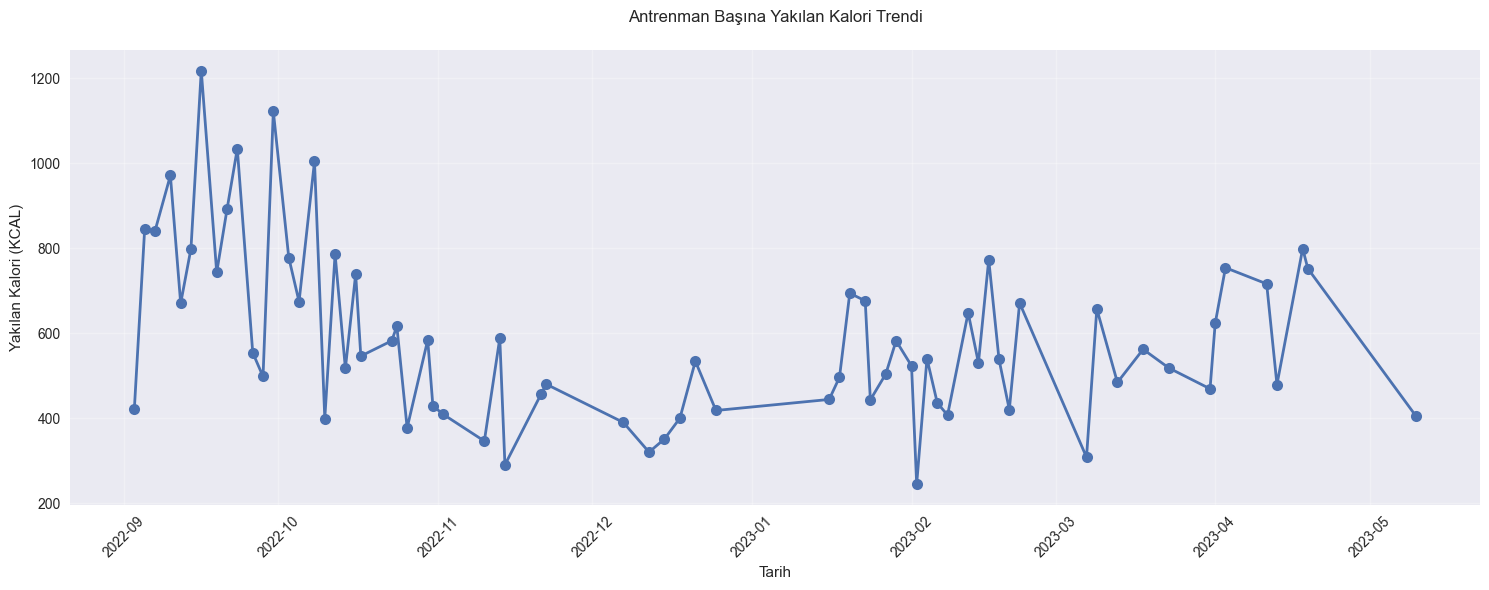

In [9]:
plt.figure(figsize=(15, 6))
plt.plot(df['Antrenman Tarihi'], df['Yakılan Kalori'], marker='o', linestyle='-', linewidth=2, markersize=8)
plt.title('Antrenman Başına Yakılan Kalori Trendi', pad=20)
plt.xlabel('Tarih')
plt.ylabel('Yakılan Kalori (KCAL)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3.2 Antrenör Bazlı Kalori Dağılımı

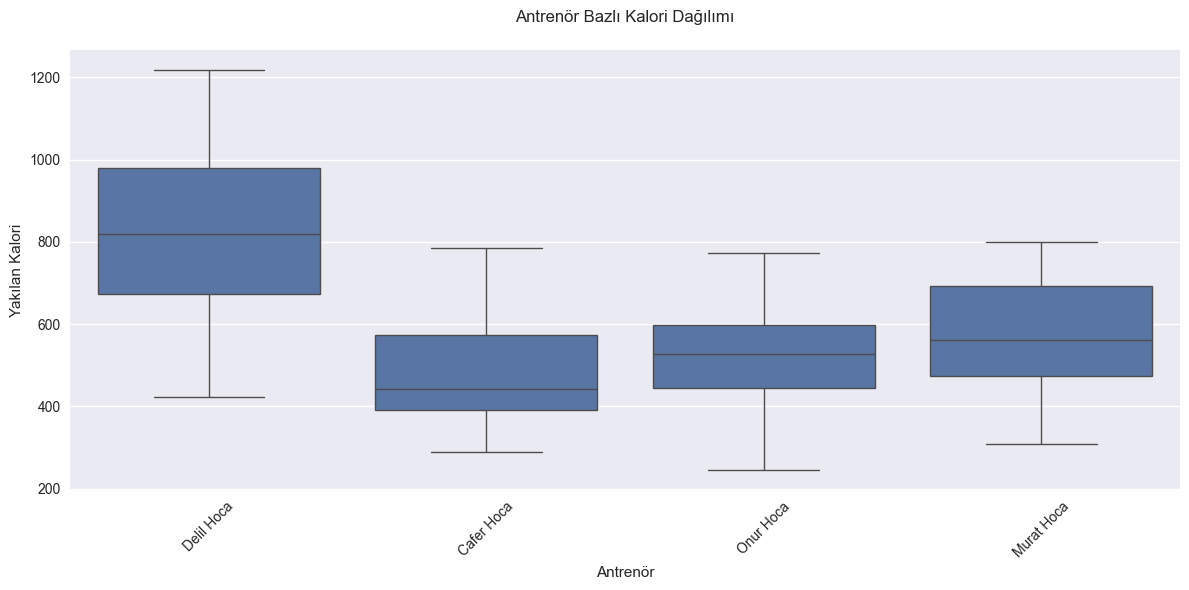

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Antrenör', y='Yakılan Kalori')
plt.title('Antrenör Bazlı Kalori Dağılımı', pad=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3.3 Kalori ve Kalp Atış Hızı İlişkisi

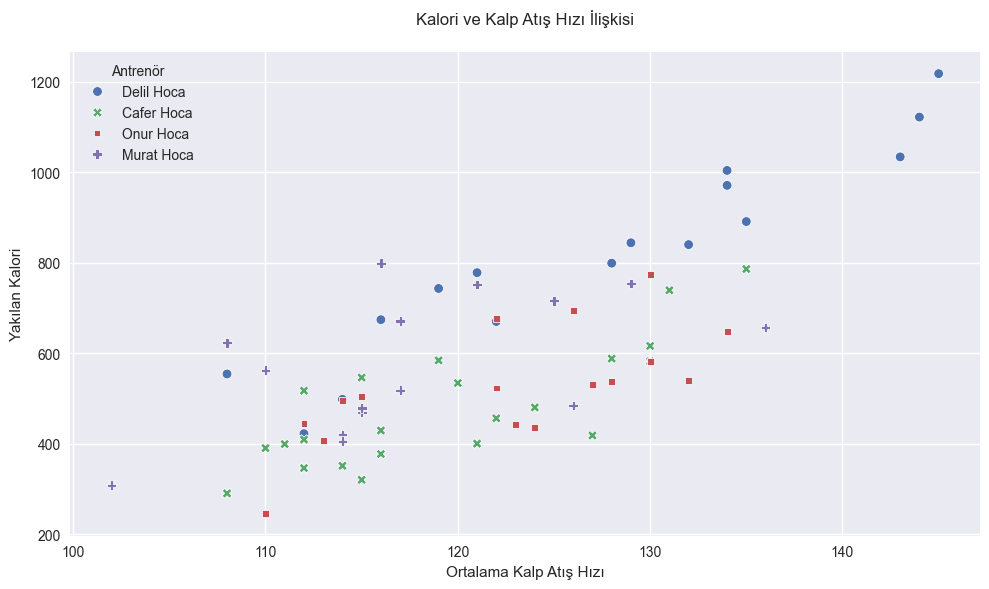

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Ortalama Kalp Atış Hızı', y='Yakılan Kalori', hue='Antrenör', style='Antrenör')
plt.title('Kalori ve Kalp Atış Hızı İlişkisi', pad=20)
plt.tight_layout()
plt.show()

### 3.4 Aylık Performans Analizi

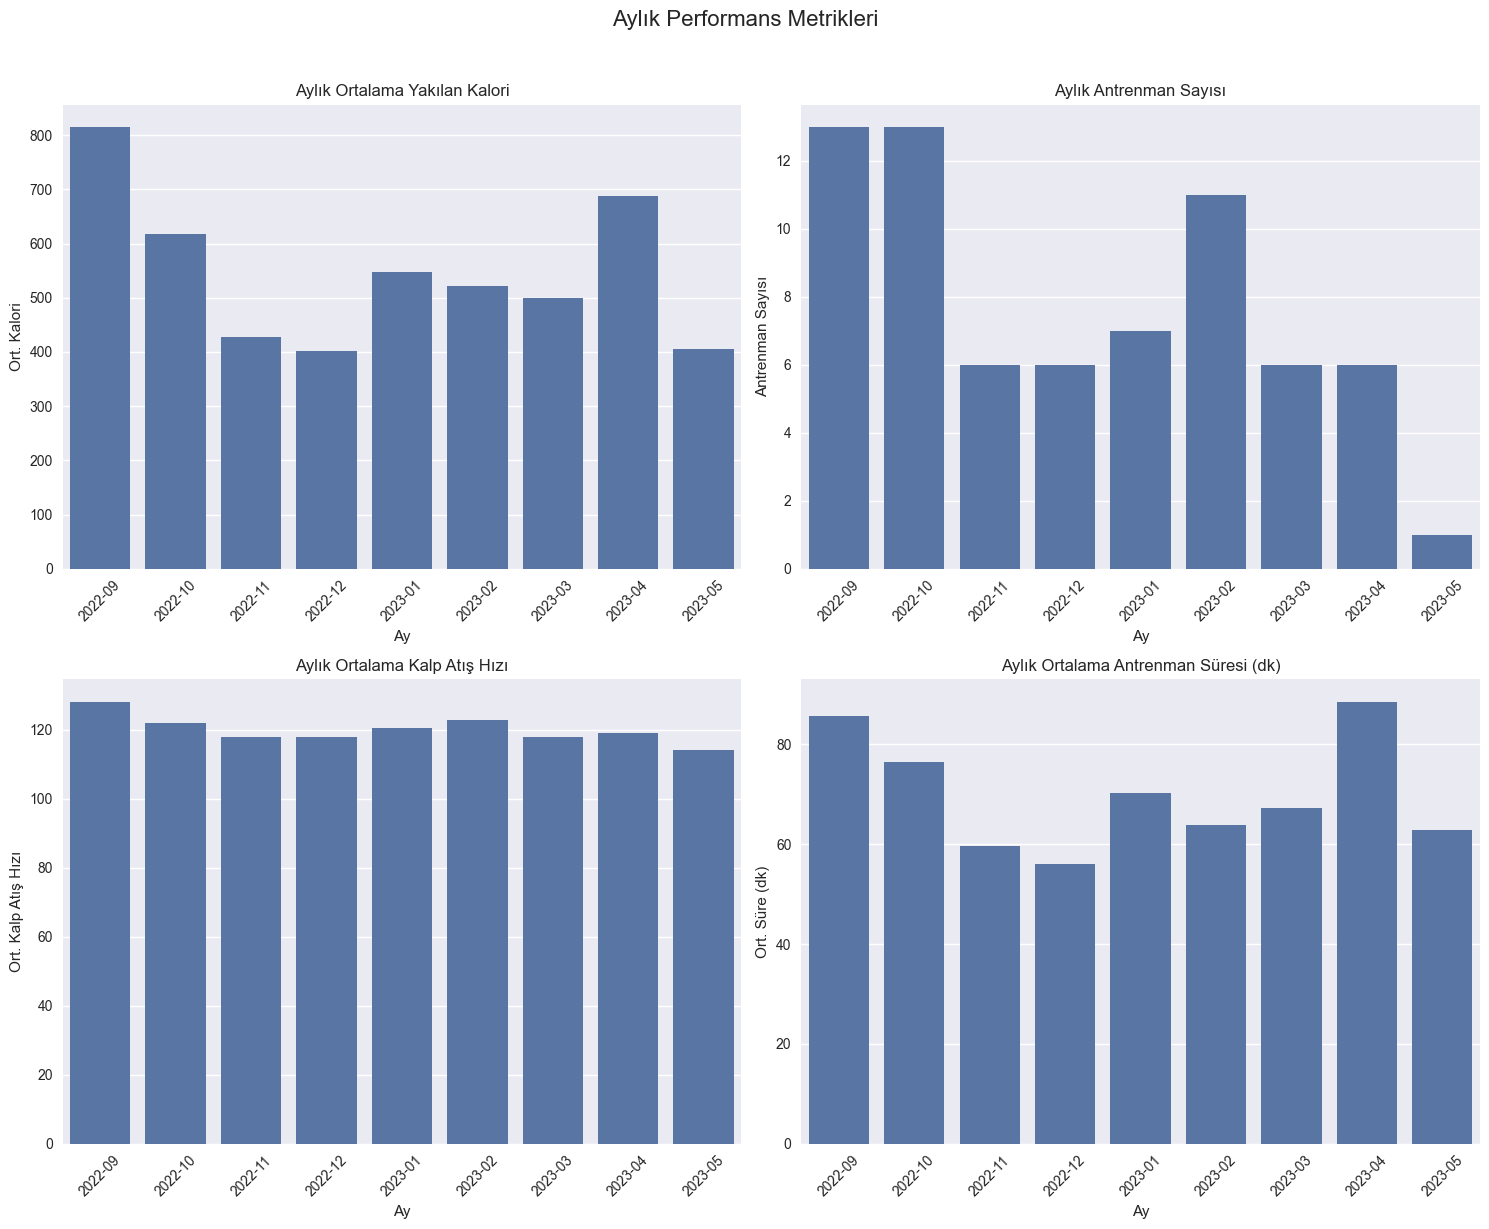

In [12]:
df['Ay'] = df['Antrenman Tarihi'].dt.strftime('%Y-%m')
monthly_stats = df.groupby('Ay').agg({
    'Yakılan Kalori': ['mean', 'count'],
    'Ortalama Kalp Atış Hızı': 'mean',
    'Antrenman Süresi (Dakika)': 'mean'
}).round(1)

monthly_stats.columns = ['Ort. Kalori', 'Antrenman Sayısı', 'Ort. Kalp Atış Hızı', 'Ort. Süre (dk)']
monthly_stats = monthly_stats.reset_index()

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Aylık Performans Metrikleri', fontsize=16, y=1.02)

# Aylık Ortalama Kalori
sns.barplot(data=monthly_stats, x='Ay', y='Ort. Kalori', ax=axes[0,0])
axes[0,0].set_title('Aylık Ortalama Yakılan Kalori')
axes[0,0].tick_params(axis='x', rotation=45)

# Aylık Antrenman Sayısı
sns.barplot(data=monthly_stats, x='Ay', y='Antrenman Sayısı', ax=axes[0,1])
axes[0,1].set_title('Aylık Antrenman Sayısı')
axes[0,1].tick_params(axis='x', rotation=45)

# Aylık Ortalama Kalp Atış Hızı
sns.barplot(data=monthly_stats, x='Ay', y='Ort. Kalp Atış Hızı', ax=axes[1,0])
axes[1,0].set_title('Aylık Ortalama Kalp Atış Hızı')
axes[1,0].tick_params(axis='x', rotation=45)

# Aylık Ortalama Antrenman Süresi
sns.barplot(data=monthly_stats, x='Ay', y='Ort. Süre (dk)', ax=axes[1,1])
axes[1,1].set_title('Aylık Ortalama Antrenman Süresi (dk)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 3.5 Antrenman Süresi ve Kalori İlişkisi

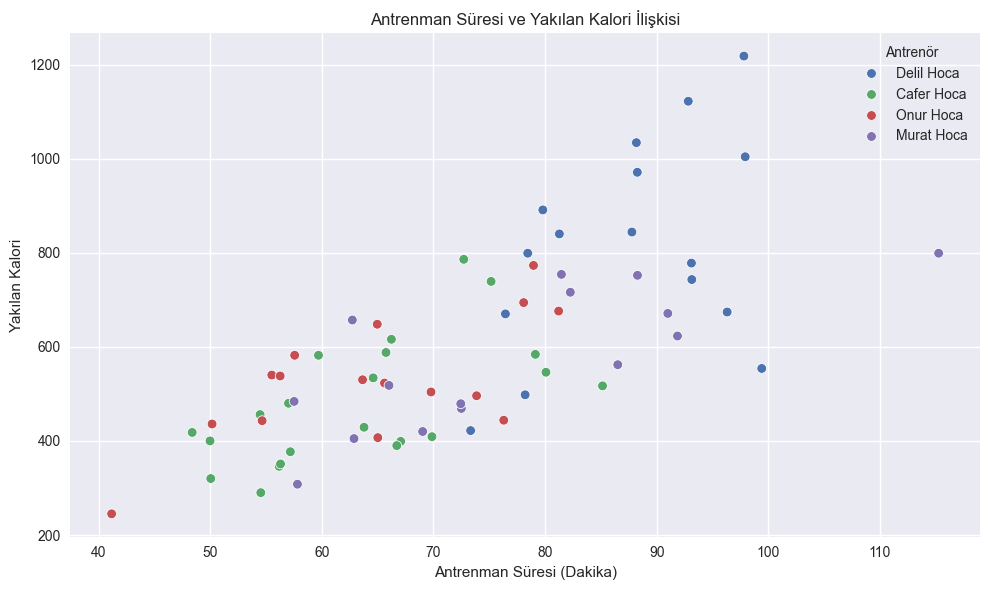

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Antrenman Süresi (Dakika)', y='Yakılan Kalori', hue='Antrenör')
plt.title('Antrenman Süresi ve Yakılan Kalori İlişkisi')
plt.tight_layout()
plt.show()

### 3.6 Korelasyon Matrisi

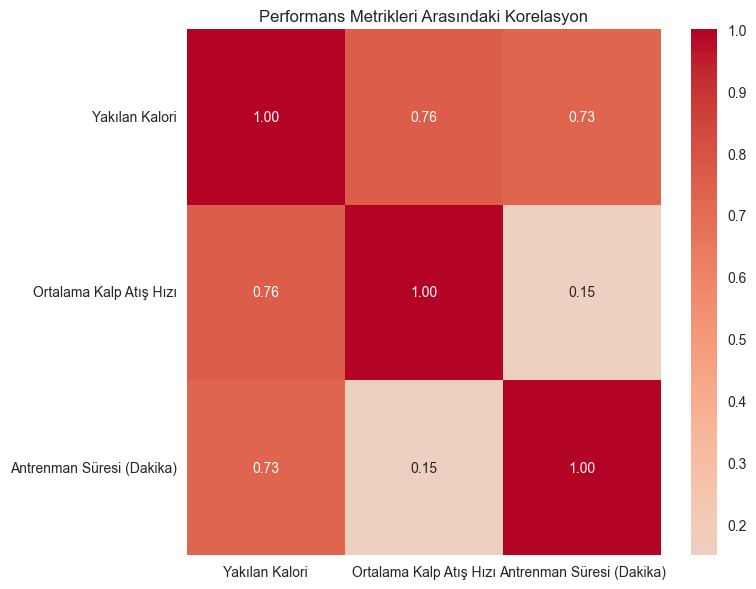

In [14]:
correlation_matrix = df[['Yakılan Kalori', 'Ortalama Kalp Atış Hızı', 'Antrenman Süresi (Dakika)']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Performans Metrikleri Arasındaki Korelasyon')
plt.tight_layout()
plt.show()

## 4. Performans Analizleri

In [16]:
print("=== PERFORMANS ANALİZLERİ ===")

# En yüksek kalori yakılan antrenmanlar
print("\nEn Yüksek Kalori Yakılan 5 Antrenman:")
top_calories = df.nlargest(5, 'Yakılan Kalori')[['Antrenman Tarihi', 'Antrenör', 'Yakılan Kalori', 'Antrenman Süresi']]
print(top_calories)

# Antrenör bazlı ortalama performans
print("\nAntrenör Bazlı Ortalama Performans:")
trainer_stats = df.groupby('Antrenör').agg({
    'Yakılan Kalori': ['mean', 'std'],
    'Ortalama Kalp Atış Hızı': 'mean',
    'Antrenman Süresi (Dakika)': 'mean'
}).round(1)
trainer_stats.columns = ['Ort. Kalori', 'Std. Kalori', 'Ort. Kalp Atış Hızı', 'Ort. Süre (dk)']
print(trainer_stats)

# Haftalık trend analizi
df['Hafta'] = df['Antrenman Tarihi'].dt.isocalendar().week
weekly_stats = df.groupby('Hafta').agg({
    'Yakılan Kalori': ['mean', 'count'],
    'Antrenman Süresi (Dakika)': 'mean'
}).round(1)
weekly_stats.columns = ['Ort. Kalori', 'Antrenman Sayısı', 'Ort. Süre (dk)']

print("\nHaftalık Antrenman İstatistikleri:")
print(weekly_stats)

=== PERFORMANS ANALİZLERİ ===

En Yüksek Kalori Yakılan 5 Antrenman:
   Antrenman Tarihi    Antrenör  Yakılan Kalori Antrenman Süresi
6        2022-09-16  Delil Hoca          1218.0         01:37:49
12       2022-09-30  Delil Hoca          1122.0         01:32:50
9        2022-09-23  Delil Hoca          1034.0         01:28:11
15       2022-10-08  Delil Hoca          1004.0         01:37:56
3        2022-09-10  Delil Hoca           971.0         01:28:16

Antrenör Bazlı Ortalama Performans:
            Ort. Kalori  Std. Kalori  Ort. Kalp Atış Hızı  Ort. Süre (dk)
Antrenör                                                                 
Cafer Hoca        479.9        131.1                119.5            63.6
Delil Hoca        816.4        222.5                127.2            87.6
Murat Hoca        574.5        148.3                117.7            77.2
Onur Hoca         529.9        128.1                122.6            64.6

Haftalık Antrenman İstatistikleri:
       Ort. Kalori  Antr